# Gray Scott equations

$\frac{\partial u}{\partial t} = r_u \nabla^2u-uv^2+f\left(1-u\right)$

$\frac{\partial v}{\partial t} = r_v \nabla^2v+uv^2-\left(f+k\right)v$

$u = u + \frac{\partial  u}{\partial t}$

$v = v + \frac{\partial  v}{\partial t}$

What do we know about this? 

* $u$ and $v$ -- concentrations of chemical species U and V
* $r_u$ and $r_v$ -- diffusion rates
* $k$ -- rate of conversion V to P
* $f$ -- rate of the process that feeds U and drains U,V and P. 
* $\nabla^2v$ -- difference of the concentration $v$ at current point vs. its surroundings
* $\frac{\partial u}{\partial t}$ -- speed at which concentration of u changes



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import io
import base64
from IPython.display import HTML
%matplotlib inline

### Initial Concentrations

In [2]:
side = 100
u = np.random.uniform(-1,1,[side+2,side+2])
# make a 2D array and fill it with some values, random numbers are OK
v = np.random.uniform(-1,1,[side+2,side+2])

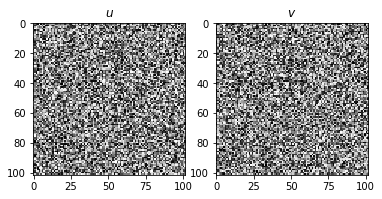

In [3]:
# Here is a function to visualize concentrations u and v:

def show_uv(u,v):
    fig = plt.figure()
    ax_u = plt.subplot(1,2,1)
    ax_u.imshow(u, cmap = plt.cm.gray)
    ax_u.set_title('$u$')
    ax_v = plt.subplot(1,2,2)
    ax_v.imshow(v, cmap = plt.cm.gray)
    ax_v.set_title('$v$')
    plt.show()
    
show_uv(u,v)

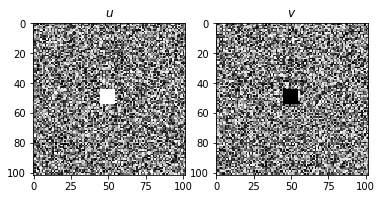

In [4]:
def insert_obj(m, obj, coords):
    br_coords = coords + obj.shape
    m[coords[0]:br_coords[0],coords[1]:br_coords[1]] = obj
    return m

u = insert_obj(u, np.ones([10,10]), np.asarray([45,45]))
v = insert_obj(v, -np.ones([10,10]), np.asarray([45,45]))
show_uv(u,v)

### Implement equations

In [5]:
# Bacteria 1
ru, rv = 0.16, 0.08
f, k = 0.035, 0.065

$\nabla^2 u$ and $\nabla^2 v$

In [6]:
nu = u[:-2,1:-1] + u[2:,1:-1] + u[1:-1,:-2] + u[1:-1,2:] - 4*u[1:-1,1:-1]
nv = v[:-2,1:-1] + v[2:,1:-1] + v[1:-1,:-2] + v[1:-1,2:] - 4*v[1:-1,1:-1]

$uv^2$

In [545]:
uvv = u[1:-1,1:-1]*v[1:-1,1:-1]*v[1:-1,1:-1]
uvv.shape

(100, 100)

$f\left(1-u\right)$

$\left(f+k\right)v$

In [544]:
f_u = f*(1-u[1:-1,1:-1])
f_k = (f+k)*v[1:-1,1:-1]

$\frac{\partial u}{\partial t} = r_u \nabla^2u-uv^2+f\left(1-u\right)$

$\frac{\partial v}{\partial t} = r_v \nabla^2v+uv^2-\left(f+k\right)v$

In [547]:
du = ru*nu-uvv+f_u
dv = rv*dv+uvv-f_k

Finally, update equations:

$u_{t+1} = u_t + \frac{\partial u}{\partial t}$

$v_{t+1} = v_t + \frac{\partial v}{\partial t}$

In [549]:
u[1:-1,1:-1] = u[1:-1,1:-1] + du
v[1:-1,1:-1] = v[1:-1,1:-1] + dv

Let's copy all the code from above to the cell:

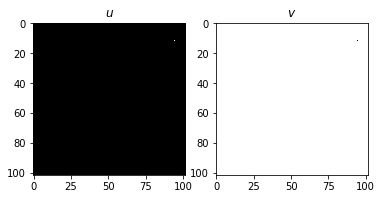

In [15]:
nu = u[:-2,1:-1] + u[2:,1:-1] + u[1:-1,:-2] + u[1:-1,2:] - 4*u[1:-1,1:-1]
nv = v[:-2,1:-1] + v[2:,1:-1] + v[1:-1,:-2] + v[1:-1,2:] - 4*v[1:-1,1:-1]
uvv = u[1:-1,1:-1]*v[1:-1,1:-1]*v[1:-1,1:-1]
f_u = f*(1-u[1:-1,1:-1])
f_k = (f+k)*v[1:-1,1:-1]
du = ru*nu-uvv+f_u
dv = rv*nv+uvv-f_k
u[1:-1,1:-1] = u[1:-1,1:-1] + du
v[1:-1,1:-1] = v[1:-1,1:-1] + dv
show_uv(u,v)

In [ ]:
# try running multiple simulations 
for i in range(100):
    pass

## Better starting concentrations

In [16]:
# Bacteria 1
ru, rv = 0.16, 0.08
f, k = 0.035, 0.065

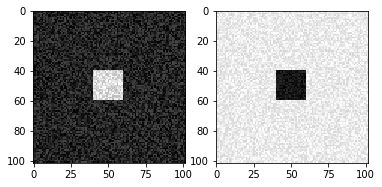

In [17]:
u = np.ones([side+2,side+2])
v = np.zeros([side+2,side+2])

u = insert_obj(u, np.ones([20,20])*0.5, np.asarray([40,40]))
v = insert_obj(v, np.ones([20,20])*0.25, np.asarray([40,40]))

u += np.random.uniform(-0.05,0.05,[side+2,side+2])
v += np.random.uniform(-0.05,0.05,[side+2,side+2])

fig = plt.figure()
im1 = plt.subplot(121).imshow(v, cmap = plt.cm.gray)
im2 = plt.subplot(122).imshow(u, cmap = plt.cm.gray)
plt.show()

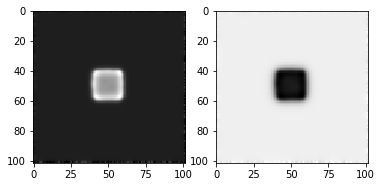

In [21]:
for i in range(10):
    nu = u[:-2,1:-1] + u[2:,1:-1] + u[1:-1,:-2] + u[1:-1,2:] - 4*u[1:-1,1:-1]
    nv = v[:-2,1:-1] + v[2:,1:-1] + v[1:-1,:-2] + v[1:-1,2:] - 4*v[1:-1,1:-1]
    uvv = u[1:-1,1:-1]*v[1:-1,1:-1]*v[1:-1,1:-1]
    f_u = f*(1-u[1:-1,1:-1])
    f_k = (f+k)*v[1:-1,1:-1]
    du = ru*nu-uvv+f_u
    dv = rv*nv+uvv-f_k
    u[1:-1,1:-1] = u[1:-1,1:-1] + du
    v[1:-1,1:-1] = v[1:-1,1:-1] + dv

fig = plt.figure()
im1 = plt.subplot(121).imshow(v, cmap = plt.cm.gray)
im2 = plt.subplot(122).imshow(u, cmap = plt.cm.gray)
plt.show()

## Making a video

In [22]:
# Bacteria 1
ru, rv = 0.16, 0.08
f, k = 0.035, 0.065

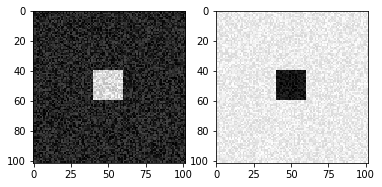

In [24]:
u = np.ones([side+2,side+2])
v = np.zeros([side+2,side+2])

u = insert_obj(u, np.ones([20,20])*0.5, np.asarray([40,40]))
v = insert_obj(v, np.ones([20,20])*0.25, np.asarray([40,40]))

u += np.random.uniform(-0.05,0.05,[side+2,side+2])
v += np.random.uniform(-0.05,0.05,[side+2,side+2])

fig = plt.figure()
im1 = plt.subplot(121).imshow(v, cmap = plt.cm.gray)
im2 = plt.subplot(122).imshow(u, cmap = plt.cm.gray)
plt.show()

In [25]:
def update(frame):
    global u
    global v
    global im
    
    nu = u[:-2,1:-1] + u[2:,1:-1] + u[1:-1,:-2] + u[1:-1,2:] - 4*u[1:-1,1:-1]
    nv = v[:-2,1:-1] + v[2:,1:-1] + v[1:-1,:-2] + v[1:-1,2:] - 4*v[1:-1,1:-1]
    uvv = u[1:-1,1:-1]*v[1:-1,1:-1]*v[1:-1,1:-1]
    f_u = f*(1-u[1:-1,1:-1])
    f_k = (f+k)*v[1:-1,1:-1]
    du = ru*nu-uvv+f_u
    dv = rv*nv+uvv-f_k
    u[1:-1,1:-1] = u[1:-1,1:-1] + du
    v[1:-1,1:-1] = v[1:-1,1:-1] + dv
    
    im1.set_data(v)
    im2.set_data(u)

In [26]:
anim = FuncAnimation(fig, update, interval = 10, frames = 100)
anim.save('grayscott-2.mp4', fps = 30)

video = io.open('grayscott-2.mp4','r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''.format(encoded.decode('ascii')))

# Other coefficient values

| Name | $r_u$ | $r_v$ | f | k |
| -----| ----- | ----- | - | - |
| Bacteria 1| 0.16 | 0.08 | 0.035 | 0.065 |
| Bacteria 2| 0.14 | 0.06 | 0.035 | 0.065 |
| Coral| 0.16 | 0.08 | 0.060 | 0.062 |
| Fingerprint | 0.19 | 0.05 | 0.060 | 0.062 |
| Spirals| 0.10 | 0.10 | 0.018 | 0.050 |
| Spirals Dense | 0.12 | 0.08 | 0.020 | 0.050 |
| Spirals Fast | 0.10 | 0.16 | 0.020 | 0.050 |
| Unstable | 0.16 | 0.08 | 0.020 | 0.055 |
| Worms 1| 0.16 | 0.08 | 0.050 | 0.065 |
| Worms 2| 0.16 | 0.08 | 0.054 | 0.063 |
| Zebrafish| 0.16 | 0.08 | 0.035 | 0.060 |